# *TP1 - DEEP LEARNING*

# Partie 2 : _Implémentation avec Pytorch_


### 2.4 Simplification de SGD avec `torch.optim`

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data

import numpy as np
import matplotlib.pyplot as plt

**Chargement des données : CirclesData**



In [2]:
# charger les utilitaires de générations et visualisation des données
from utilitaires import *

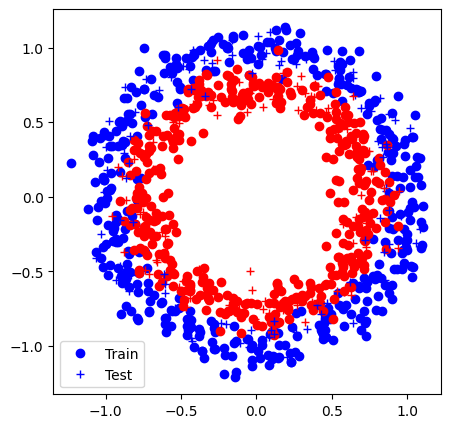

In [3]:
# charger / préparer / visualiser les données pour apprentissage
data = CirclesData()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
plot_data(data)

##### **Mise à jour de la fonciton `init_model` qui déclare l'architecture du modèle, la loss et l'optimiseur.**

In [ ]:
def init_model(nx, nh, ny, eta):

    model = loss = optim = None
    
    #####################
    ## Votre code ici  ##
    #####################


    return model, loss, optim

La fonction `loss_accuracy` reste inchangée mais la fonction `sgd` est supprimée. À la place, on fera un appel à `optim.zero_grad()` avant de faire le backward et à `optim.step()` après le backward.

In [ ]:
def loss_accuracy(loss, Yhat, Y):
    """
    - In    :
    Yhat    :
    Y       :
    - Out   :
    L       :
    acc     :
    """

    L = acc = None
    #####################
    ## Votre code ici  ##
    #####################

    return L, acc

##### **Mise à jour de l'algorithme global (avec autograd, les couches `torch.nn` et `torch.optim`)**

In [ ]:
#initialisation des params
model,loss_fn, optim = init_model(nx, nh, ny, eta=0.03)

# epoch
curves = [[], [], [], [], [], []]
for iteration in range(200):

    # permutations
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #initialisation loss et acc par bacth
    Loss=[]
    Acc=[]

    for j in range(N // Nbatch):
        
        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        #####################
        ## Votre code ici  ##
        #####################

        loss = acc = None
        
        # écrire l'algorithme d'apprentissage sur le batch (X,Y)
        # en utilisant la fonction loss_accuracy
        # effectuer le forward en faisant un appel au modèle
        # calculer les gradients avec la fonction backward de l'autograd
        # Puis une "step" d'optimisation

        Loss.append(loss)
        Acc.append(acc)
    
    # accummulation de la loss et des accuracy par batch  
    LBatch = sum(Loss)/len(Loss)
    accBatch = sum(Acc)/len(Acc)
    # ou bien calculer sur la dataset d'entrainement entière
    Yhat_train = model(data.Xtrain)
    Ltrain, acctrain = loss_accuracy(loss_fn,Yhat_train, data.Ytrain.to(Yhat_train.dtype))

    Yhat_test = model(data.Xtest)
    Ltest, acctest = loss_accuracy(loss_fn,Yhat_test, data.Ytest.to(Yhat_test))
    
    if iteration % 20 == 0 :
        title = f'\n Iter {iteration}: Acc. train {acctrain:.1f}% ({Ltrain:.2f}), Acc. test {acctest:.1f}% ({Ltest:.2f})'
        Ygrid = model(data.Xgrid)
        plot_data_with_grid(data,torch.nn.Softmax(dim=1)(Ygrid).detach().numpy(), title)

    curves[0].append(accBatch)
    curves[1].append(acctrain)
    curves[2].append(acctest)

    curves[3].append(LBatch.detach().numpy())
    curves[4].append(Ltrain.detach().numpy())
    curves[5].append(Ltest.detach().numpy())

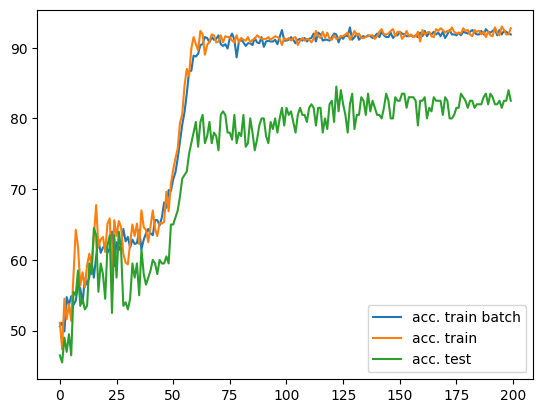

In [7]:
fig = plt.figure()
plt.plot(curves[0], label="acc. train batch")
plt.plot(curves[1], label="acc. train")
plt.plot(curves[2], label="acc. test")
plt.legend()
plt.show()

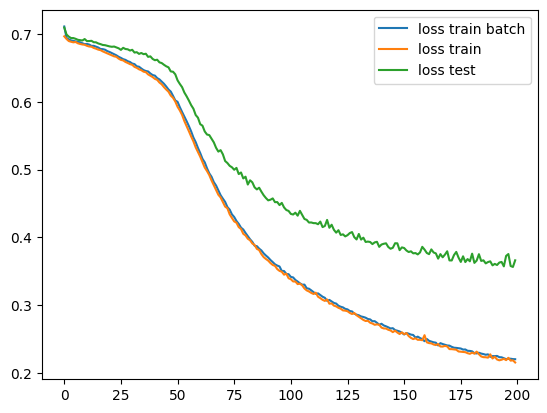

In [8]:
fig = plt.figure()
plt.plot(curves[3], label="loss train batch")
plt.plot(curves[4], label="loss train")
plt.plot(curves[5], label="loss test")

plt.legend()
plt.show()